# Implement DQN for CartPole Game
Refer CartPole.ipynb file to understand the CArtpole game and the enviroment setup. Environment is essentially set up by [openAI gym](https://gym.openai.com/envs/#classic_control). <br>

There are other environments are also available in OpenAI.

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import os

import collections
from collections import deque 
import pickle

#environment
import gym

# the agent
from agent import CartpoleAgent

In [2]:
# Store the environment from gym
env= gym.make('CartPole-v0')

Check state size and action size

In [3]:
state_size= env.observation_space.shape[0]
print(state_size)

4


In [4]:
action_size = env.action_space.n 
print(action_size)

2


Load `CartpoleAgent()` class

In [5]:
agent= CartpoleAgent(action_size=action_size, state_size=state_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
# Number of episodes simulation
n_episodes= 500

## Start the training

Print the reward after end every 10 episodes

In [11]:
rewards_per_episode, episodes= [], []

for episode in range(n_episodes):

  # Initialize before each new episode
  done= False
  score= 0

  state= env.reset()

  while not done:

    # take epsilon greedy action
    action= agent.get_action(state)
    # Calculate nest state, reward etc.
    next_state, reward, done, info = env.step(action)

    # Save this experience to memeory
    agent.append_sample(state, action, reward, next_state, done)

    #train after each staep
    agent.train_model()

    # Calculate reward
    score += reward
    state = next_state

  # Store the total reward after each episode
  rewards_per_episode.append(score)
  episodes.append(episode)

  # epsilon decay
  if agent.epsilon > agent.epsilon_min:
    agent.epsilon *= agent.epsilon_decay

  # print performance at every episode:
  if episode % 10 == 0:
     print("episode {0}, reward {1}, memory_length {2}, epsilon {3}  ".format(episode, score, len(agent.memory), agent.epsilon))
     #agent.save_model_weights(name="model_weights.h5")


episode 0, reward 23.0, memory_length 273, epsilon 0.8775210229989678  
episode 10, reward 18.0, memory_length 565, epsilon 0.7936142836436553  
episode 20, reward 20.0, memory_length 790, epsilon 0.7177305325982748  
episode 30, reward 109.0, memory_length 1154, epsilon 0.6491026283684022  
episode 40, reward 74.0, memory_length 1575, epsilon 0.5870367819374844  
episode 50, reward 36.0, memory_length 2000, epsilon 0.5309055429551132  
episode 60, reward 88.0, memory_length 2000, epsilon 0.4801414565714212  
episode 70, reward 90.0, memory_length 2000, epsilon 0.4342313267918117  
episode 80, reward 200.0, memory_length 2000, epsilon 0.392711028357805  
episode 90, reward 165.0, memory_length 2000, epsilon 0.35516081470507305  
episode 100, reward 45.0, memory_length 2000, epsilon 0.3212010745647914  
episode 110, reward 200.0, memory_length 2000, epsilon 0.2904884943099637  
episode 120, reward 43.0, memory_length 2000, epsilon 0.2627125872502282  
episode 130, reward 200.0, memory_l

KeyboardInterrupt: ignored

## Save the model weights and rewards

In [12]:
#### simulation complete ####

# save stuff as pickle
def save_pickle(obj, name):
  with open(name + '.pkl', 'wb') as f:
    pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# make directory
if not os.path.exists("saved_pickle_files"):
  os.mkdir("saved_pickle_files")

# save rewards_per_episode
save_pickle(rewards_per_episode, "saved_pickle_files/rewards_per_episode")



Plot model performance

Average reward of last 100 episodes is 140.56


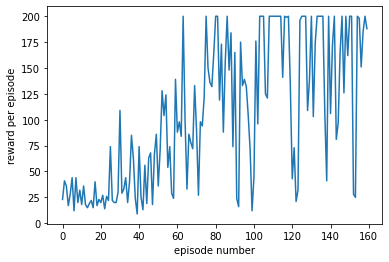

In [13]:

# plot results
with open('saved_pickle_files/rewards_per_episode.pkl', 'rb') as f:
    rewards_per_episode = pickle.load(f)

plt.plot(list(range(len(rewards_per_episode))), rewards_per_episode)
plt.xlabel("episode number")
plt.ylabel("reward per episode")

# save plots in saved_plots/ directory
plt.savefig('rewards.png')

print("Average reward of last 100 episodes is {0}".format(np.mean(rewards_per_episode[-100:]))) 